/home/chengyiqiu/miniconda3/envs/Diffusion-Backdoor-Embed/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/chengyiqiu/miniconda3/envs/Diffusion-Backdoor-Embed/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


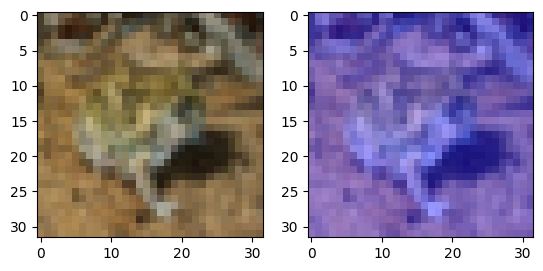

In [8]:
import sys
sys.path.append('../')
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from tools.dataset import get_dataloader
from tools.img import tensor2ndarray
import matplotlib.pyplot as plt

_, _, no_norm_ld = get_dataloader('cifar10', 64)
x_benign, x_poison = None, None
ground_truth = 0

for x, y in iter(no_norm_ld):
    x_benign = x
    ground_truth = y
    break

x_benign = x_benign[0]
ground_truth = ground_truth[0]

rgb_img = tensor2ndarray(x_benign) / 255.

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
input_tensor = x_benign.unsqueeze(0)

# We have to specify the target we want to generate the CAM for.
targets = [ClassifierOutputTarget(281)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
  # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
  # In this example grayscale_cam has only one image in the batch:
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
  # You can also get the model outputs without having to redo inference
  model_outputs = cam.outputs

_, ax = plt.subplots(1, 2)

ax[0].imshow(rgb_img)
ax[1].imshow(visualization, cmap='hot')
plt.show()